In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

df = pd.read_csv('C:/Users/Jillian/Desktop/2008.csv.bz2',compression='bz2')

In [2]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [3]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [4]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [5]:
df = df[df.Cancelled != 1]
df = df.drop(columns=['Cancelled', 'CancellationCode'])

In [6]:
df = df.dropna()

In [7]:
df['LateArrival'] = df['ArrDelay'] < 30
df['LateArrival'] = pd.get_dummies(df['LateArrival'])

In [8]:
df['LateArrival'].value_counts()

1    927413
0    597320
Name: LateArrival, dtype: int64

In [9]:
on_time = df[df['LateArrival'] == 0]
late = df[df['LateArrival'] == 1]

In [10]:
from sklearn.utils import resample

late = resample(late, n_samples=597320)

df_2 = pd.concat([late, on_time])

In [11]:
df_2['LateArrival'].value_counts()

1    597320
0    597320
Name: LateArrival, dtype: int64

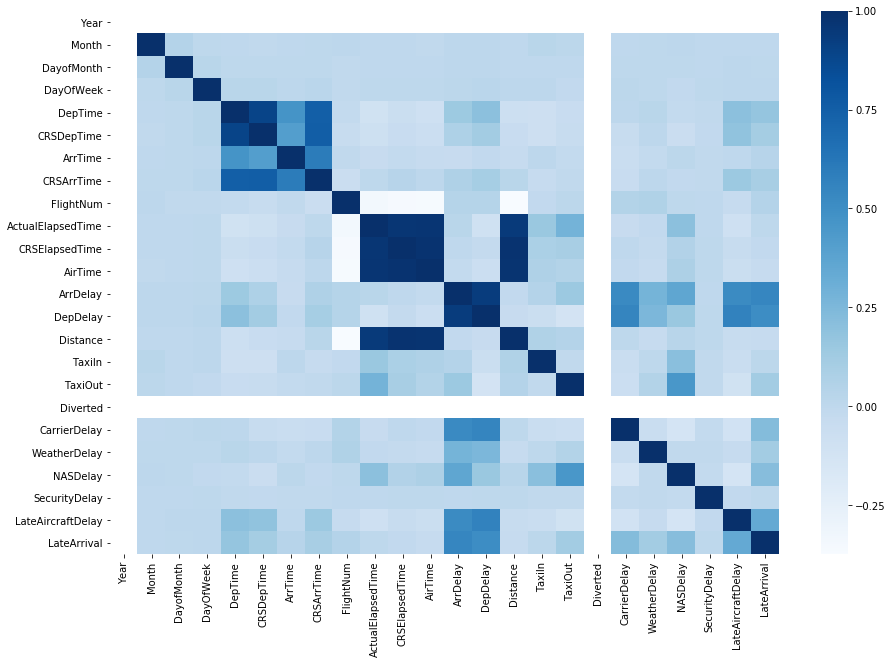

In [46]:
corr = df_2.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,cmap='Blues')

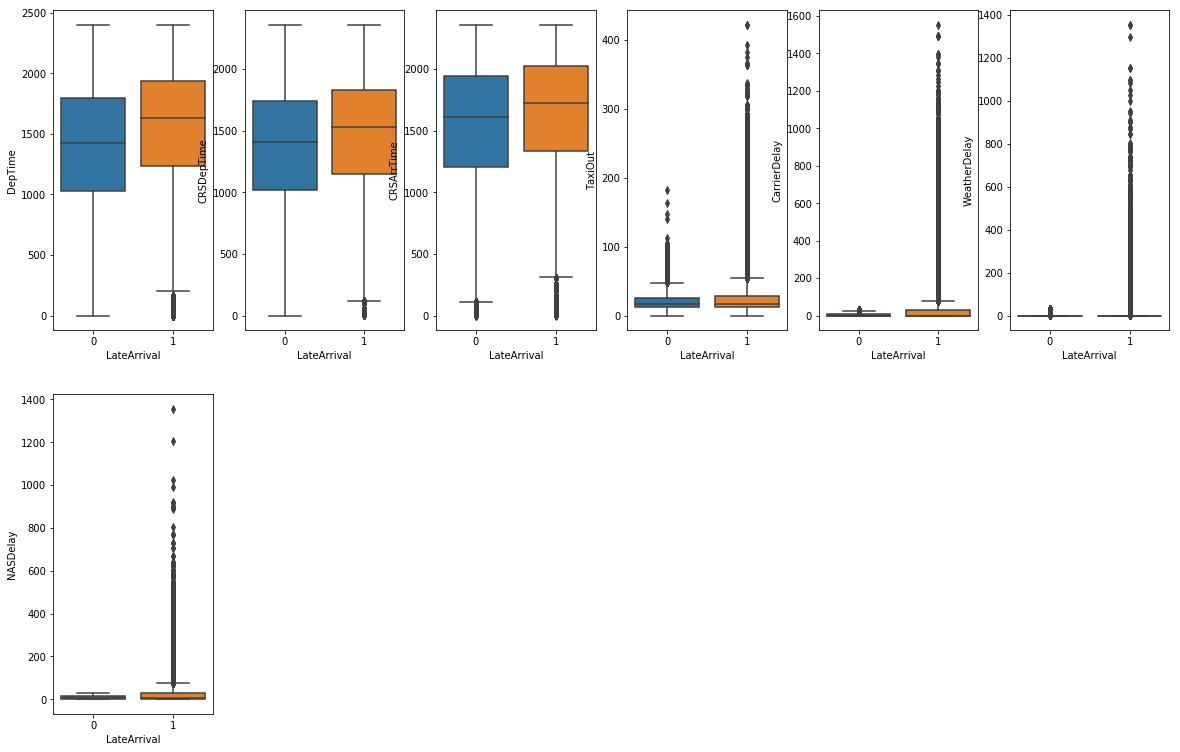

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(3,6,1)
sns.boxplot(x = 'LateArrival', y = 'DepTime', data = df_2)

plt.subplot(3,6,2)
sns.boxplot(x = 'LateArrival', y = 'CRSDepTime', data = df_2)

plt.subplot(3,6,3)
sns.boxplot(x = 'LateArrival', y = 'CRSArrTime', data = df_2)

plt.subplot(3,6,4)
sns.boxplot(x = 'LateArrival', y = 'TaxiOut', data = df_2)

plt.subplot(3,6,5)
sns.boxplot(x = 'LateArrival', y = 'CarrierDelay', data = df_2)

plt.subplot(3,6,6)
sns.boxplot(x = 'LateArrival', y = 'WeatherDelay', data = df_2)

plt.subplot(3,6,7)
sns.boxplot(x = 'LateArrival', y = 'NASDelay', data = df_2)

In [14]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time

In [15]:
X = df_2.drop(columns=['ArrDelay','UniqueCarrier','TailNum','FlightNum','Origin','Dest','DepDelay','LateArrival'])
y = df_2.ArrDelay

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [17]:
# Ridge regression
start_time = time.time()

ridgeregr = linear_model.Ridge()
ridgeregr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.38677430152893066 seconds ---


In [18]:
start_time = time.time()

print(ridgeregr.score(X_train, y_train))
print(ridgeregr.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

0.9999999999999998
0.9999999999999998
--- 0.32381153106689453 seconds ---


In [19]:
start_time = time.time()

print(cross_val_score(ridgeregr, X, y, cv=5))

print("--- %s seconds ---" % (time.time() - start_time))

[1. 1. 1. 1. 1.]
--- 3.629303455352783 seconds ---


In [22]:
predictions = ridgeregr.predict(X_test)

(array([3.79999e+05, 1.25680e+04, 1.25400e+03, 2.11000e+02, 9.50000e+01,
        5.70000e+01, 1.80000e+01, 2.10000e+01, 5.00000e+00, 4.00000e+00]),
 array([  14.99999377,  171.79999411,  328.59999445,  485.39999478,
         642.19999512,  798.99999546,  955.7999958 , 1112.59999614,
        1269.39999647, 1426.19999681, 1582.99999715]),
 <a list of 10 Patch objects>)

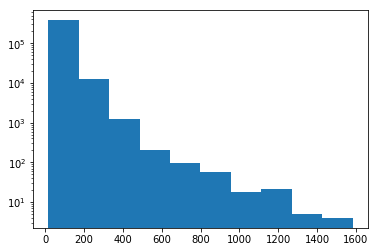

In [24]:
plt.yscale('log')
plt.hist(predictions)

(array([3.79999e+05, 1.25680e+04, 1.25400e+03, 2.11000e+02, 9.50000e+01,
        5.70000e+01, 1.80000e+01, 2.10000e+01, 5.00000e+00, 4.00000e+00]),
 array([  15. ,  171.8,  328.6,  485.4,  642.2,  799. ,  955.8, 1112.6,
        1269.4, 1426.2, 1583. ]),
 <a list of 10 Patch objects>)

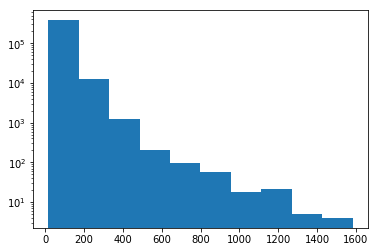

In [25]:
plt.yscale('log')
plt.hist(y_test)

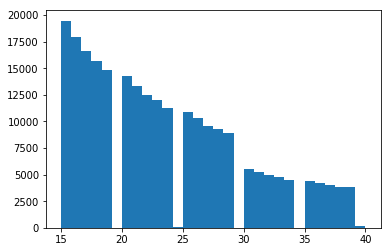

In [32]:
#plt.yscale('log')
plt.hist(predictions[predictions<40],bins=30);

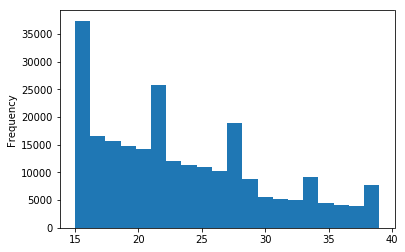

In [41]:
y_test[y_test<40].plot.hist(bins=20);

In [36]:
y_test[y_test<40].value_counts().sort_index()

15.0    19459
16.0    17944
17.0    16613
18.0    15705
19.0    14821
20.0    14280
21.0    13297
22.0    12439
23.0    12046
24.0    11266
25.0    10924
26.0    10306
27.0     9570
28.0     9298
29.0     8884
30.0     5519
31.0     5213
32.0     5000
33.0     4762
34.0     4492
35.0     4426
36.0     4193
37.0     3996
38.0     3820
39.0     3847
Name: ArrDelay, dtype: int64

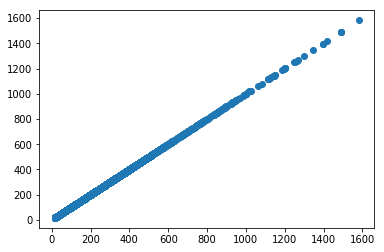

In [42]:
plt.scatter(x=predictions,y=y_test)

In [ ]:
from sklearn import svm

start_time = time.time()

svr = svm.SVR()
svr.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()

print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
start_time = time.time()

print(cross_val_score(svr, X, y, cv=5))

print("--- %s seconds ---" % (time.time() - start_time))